In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

import sklearn

seed = 10599
aqua_globals.random_seed = seed

In [3]:
### Import, process data
df = pd.read_csv("data/stem_processed.csv")

feature_dim = len(df.columns)
df



x = df[['TECH3', 'TECH6']]
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(df, test_size=0.2)

# from qiskit.ml.datasets import iris, ad_hoc_data, sample_ad_hoc_data

# feature_dim = 4
# training_size = 110
# test_size = 40

# sample_total, training_input, test_input, class_labels = iris(
#     training_size=training_size,
#     test_size=test_size,
#     n=feature_dim)

# print(test_input)
# xtrain

NameError: name 'sklearn' is not defined

In [59]:
### Create the QSVM
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0], multiclass_extension=AllPairs())

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

CircuitError: "ParameterVector x, ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]', 'x[7]', 'x[8]', 'x[9]', 'x[10]', 'x[11]', 'x[12]', 'x[13]', 'x[14]', 'x[15]', 'x[16]', 'x[17]', 'x[18]', 'x[19]', 'x[20]', 'x[21]', 'x[22]', 'x[23]', 'x[24]', 'x[25]', 'x[26]', 'x[27]', 'x[28]', 'x[29]', 'x[30]', 'x[31]', 'x[32]', 'x[33]', 'x[34]', 'x[35]', 'x[36]', 'x[37]', 'x[38]', 'x[39]', 'x[40]', 'x[41]'] has length 42, which differs from value list [-0.71211036  0.52027973 -0.47917262 -0.14995929] of len 4"

In [ ]:
### Visualize results
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Testing success ratio: 0.65

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A']
  success rate: 55.0%


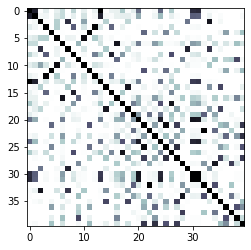

In [5]:
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');